## Data generation with multiple normalities

In [68]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
import os

### Load Datasets

In [69]:
# Function to plot timeseries data
def plot_timeseries(data, title):
    plt.figure(figsize=(10, 4))
    plt.plot(data[:1000])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Function to load data
def load_data(data_info, print_stats=False, print_plot=False):

    data_name, filepath = data_info
    df = pd.read_csv(filepath, header=None).dropna().to_numpy()

    data = df[:,0].astype(float)
    label = df[:,1].astype(int)

    if print_stats:
        print("Time series: ",data_name)
        print("Time series length: ",len(data))
        print("Number of abnormal points: ",list(label).count(1))
        print()
    if print_plot:
        plot_timeseries(data, data_name)

    return df

Time series:  Dodgers
Time series length:  50400
Number of abnormal points:  5612



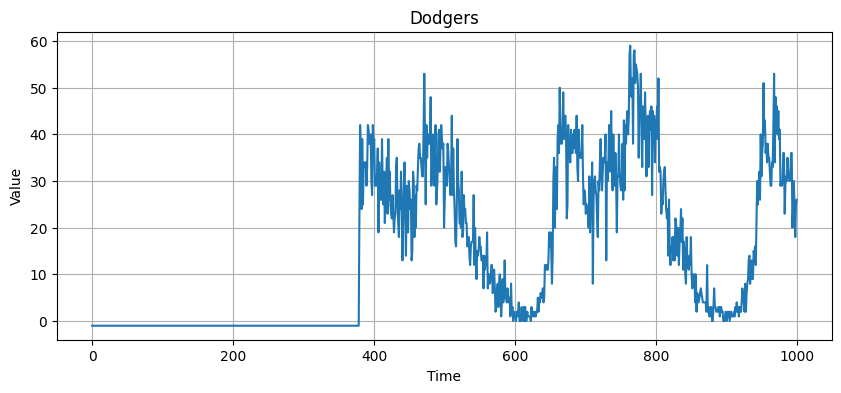

Time series:  NAB CloudWatch1
Time series length:  4031
Number of abnormal points:  400



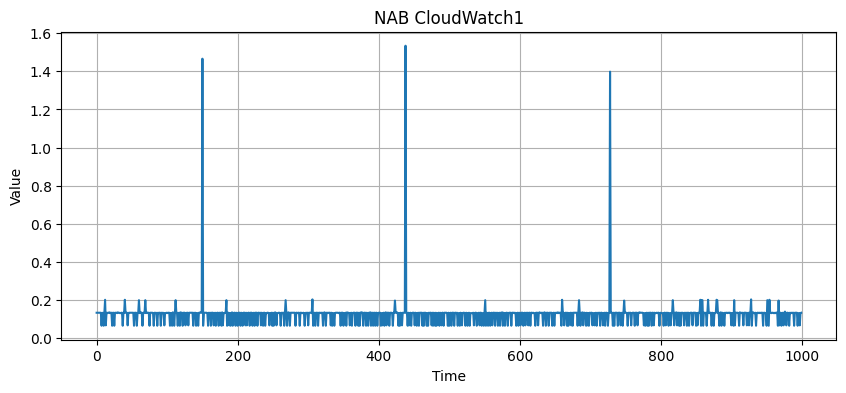

Time series:  MGAB 1
Time series length:  100000
Number of abnormal points:  200



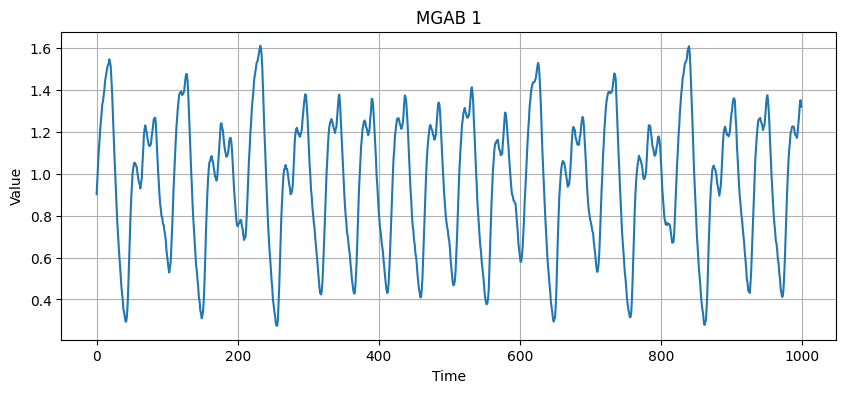

In [70]:
# Filenames of original timeseries
filepath_Dodgers = 'original_data/101-freeway-traffic.test.out'
filepath_NAB = 'original_data/NAB_data_CloudWatch_1.out'
filepath_MGAB = 'original_data/1.test.out'

original_data = {
    'Dodgers': ['Dodgers', filepath_Dodgers],
    'NAB' : ['NAB CloudWatch1', filepath_NAB],
    'MGAB': ['MGAB 1', filepath_MGAB]
}

# Brief overview of original data
for data in original_data.keys():
    load_data(original_data[data], True, True)

### Generate datasets

In [71]:
# Ensure the directory for generated data exists
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

# Validate combined data in terms of length and anomalies
def validate_data_generation(original_data,combined_data):

    original_data_length = 0
    original_data_anomalies = 0
    
    for data in original_data:
        original_data_length += len(data)
        od_label = data[:,1].astype(float)
        original_data_anomalies += list(od_label).count(1)

    cd_label = combined_data[:,1].astype(int)
    combined_data_length = len(combined_data)
    combined_data_anomalies = list(cd_label).count(1)

    return (original_data_anomalies==combined_data_anomalies)&(original_data_length==combined_data_length)

# Generate combined data with the desired normality
def generate_combined_data(data_dict, normality):
    keys = list(data_dict.keys())
    combinations = list(itertools.permutations(keys, normality))

    for combo in combinations:
        initial_data_list = [load_data(data_dict[key]) for key in combo]
        combined_data = np.concatenate(initial_data_list)

        if validate_data_generation(initial_data_list,combined_data):
            file_name = '_'.join(combo)
            file_path = f'generated_data/normality{normality}_{file_name}.out'
            ensure_dir(file_path)
            np.savetxt(file_path, combined_data, fmt='%d')
        else:
            print('Error.Something went wrong with the concatenation of datasets')

In [72]:
generate_combined_data(original_data,1)
generate_combined_data(original_data,2)
generate_combined_data(original_data,3)